In [ ]:
Exercise: Compare Rainfall Between London and Seattle
Objective: Compare the total weekly rainfall between London and Seattle over a full year.
Tasks:
Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022.
London Coordinates: Latitude 51.5074, Longitude -0.1278
Seattle Coordinates: Latitude 47.6062, Longitude -122.3321
Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
Resample Data: Resample the hourly data to weekly totals.
Visualization: Plot the weekly total precipitation for both cities on the same graph.
Analysis: Determine which city had more rainfall overall and identify any interesting patterns.
Note: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

Tips:
API Parameters: Make sure to adjust the parameters like latitude, longitude, start_date, end_date, hourly, and timezone as needed.
Error Handling: Always check if your API requests are successful before proceeding.
Data Storage: Consider saving your DataFrames to CSV files for future analysis.
Visualization: Customize your plots with titles, labels, legends, and gridlines for better readability.

In [55]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [57]:
# Step 1: Set Up Parameters

# Location coordinates for Seattle City
latitude = 47.6062
longitude = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2023-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [59]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response = requests.get(base_url, params=params)

In [61]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [63]:
data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,-6.3,77,0.0
1,2022-01-01T01:00,-6.4,76,0.0
2,2022-01-01T02:00,-8.3,82,0.0
3,2022-01-01T03:00,-8.1,82,0.0
4,2022-01-01T04:00,-7.9,81,0.0


In [65]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [67]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill

C:\Users\sreeh\AppData\Local\Temp\ipykernel_9752\2637362321.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [69]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,17520.000000,17520.000000,17520.000000
mean,10.755713,77.557934,0.122026
std,6.557758,14.726696,0.435551
min,-8.300000,20.000000,0.000000
25%,5.700000,68.000000,0.000000
50%,10.000000,81.000000,0.000000
75%,15.300000,89.000000,0.000000
max,31.300000,100.000000,7.700000


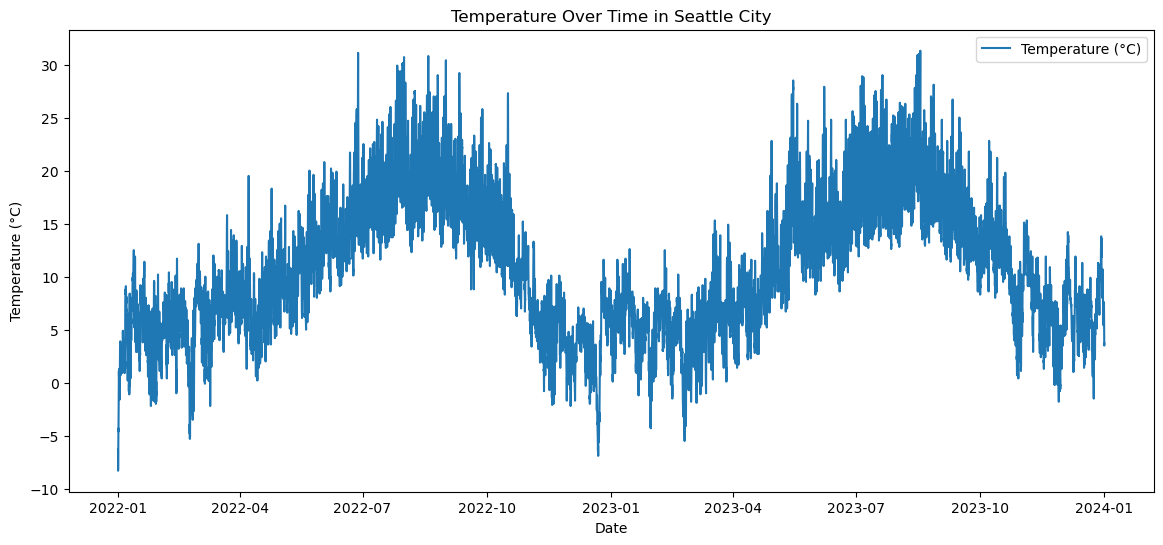

In [71]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in Seattle City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

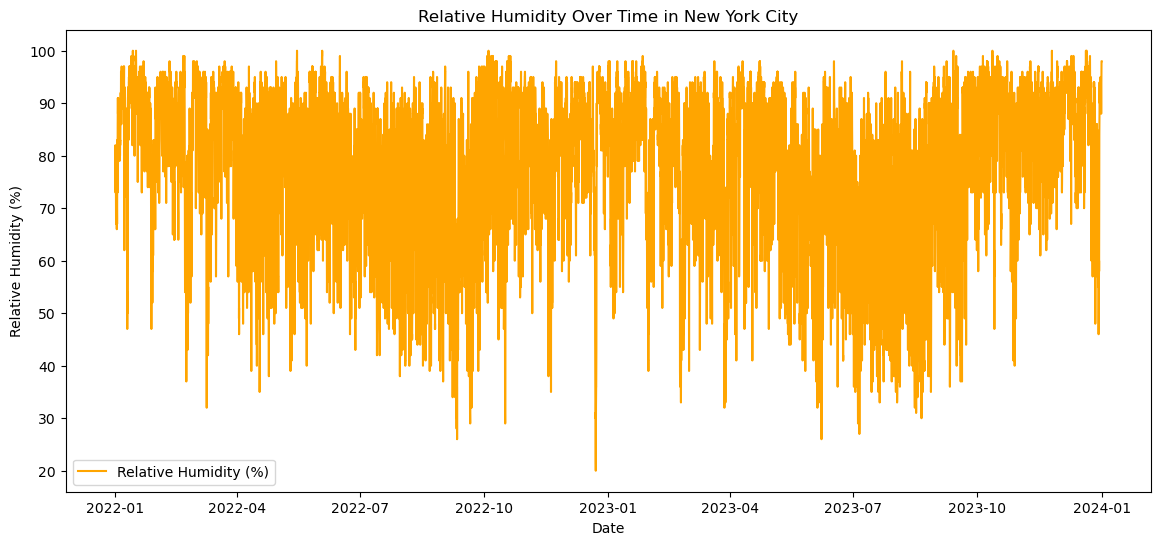

In [73]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in Seattle City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

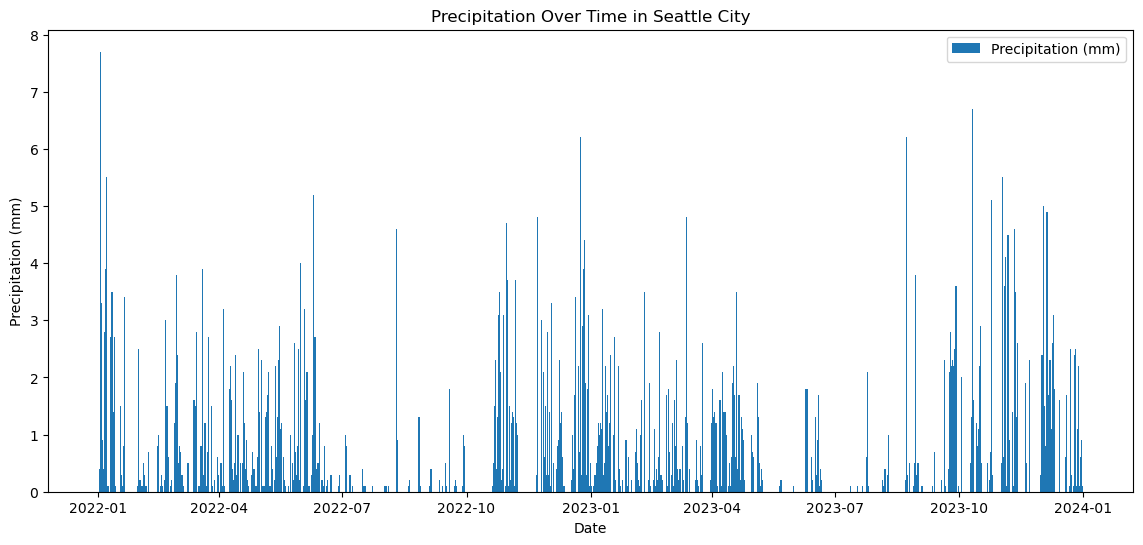

In [75]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in Seattle City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [77]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')

Correlation between Temperature and Relative Humidity: -0.53


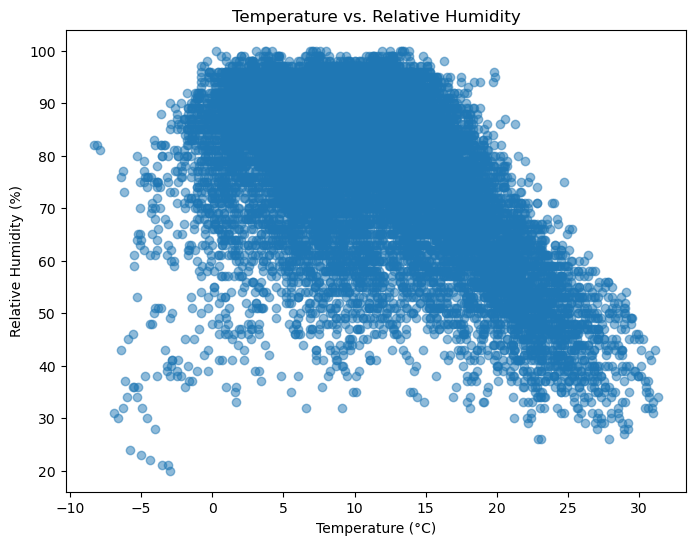

In [79]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

In [81]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-01,-2.741667,74.750000,0.000000
2022-01-02,1.412500,75.750000,1.304167
2022-01-03,2.216667,87.208333,1.004167
2022-01-04,3.183333,84.000000,0.104167
2022-01-05,2.558333,93.416667,0.316667


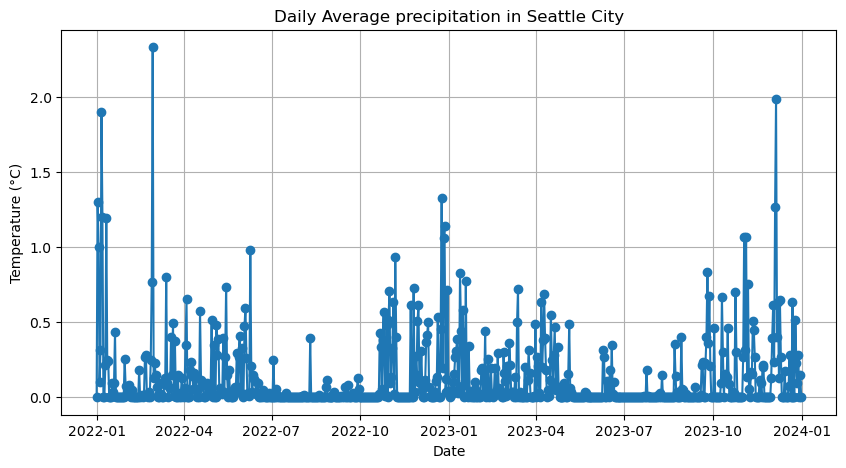

In [102]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['precipitation'], marker='o')
plt.title('Daily Average precipitation in Seattle City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [104]:
# Step 8: Compare with Another Location (London)

# Coordinates for London
latitude_la = 51.5074
longitude_la = -0.1278

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean London data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)

In [105]:
# Resample London Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()

In [108]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'Seattle': daily_avg['precipitation'],
    'London': daily_avg_la['precipitation']
})

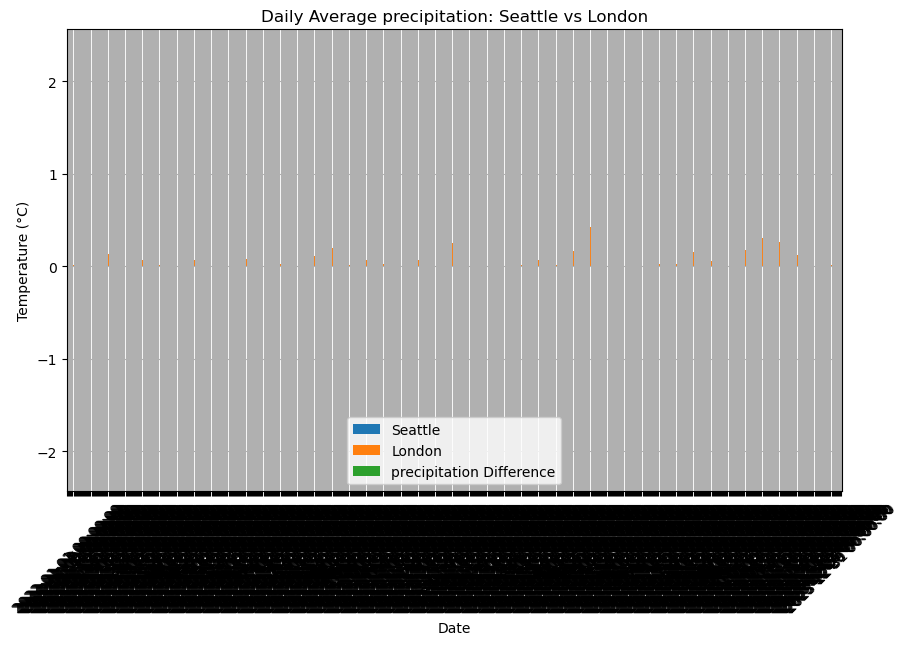

In [114]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average precipitation: Seattle vs London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [116]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['precipitation Difference'] = combined_temp['London'] - combined_temp['Seattle']
combined_temp

,Seattle,London,precipitation Difference
time,,,
2022-01-01,0.000000,0.008333,0.008333
2022-01-02,1.304167,0.083333,-1.220833
2022-01-03,1.004167,0.000000,-1.004167
2022-01-04,0.104167,0.104167,0.000000
2022-01-05,0.316667,0.000000,-0.316667
...,...,...,...
2023-12-27,0.095833,0.270833,0.175000
2023-12-28,0.279167,0.016667,-0.262500
2023-12-29,0.000000,0.062500,0.062500


In [ ]:
Seattle has more precipitation than London